#0. lib 임포트, 데이터 로드

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python_da/fish_train.csv')
print(df.head(3))

   Type  Length      Depth         Kg
0  tuna   55.46  13.240930   8.631268
1  tuna   72.07  17.671346  19.288996
2  tuna   62.84  15.635367  13.140561


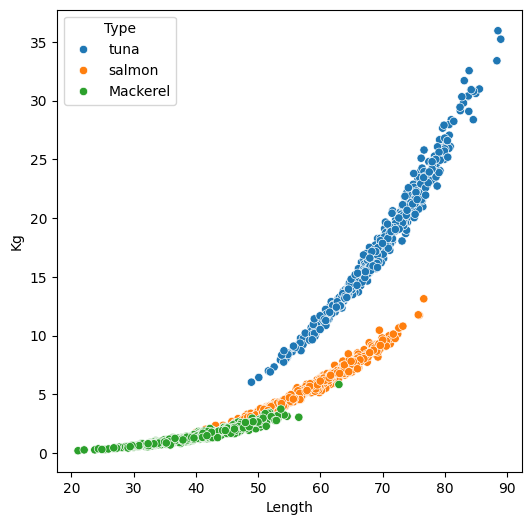

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
sns.scatterplot(x=df['Length'], y=df['Kg'], hue=df['Type'], ax=ax)
plt.show()

#1. Logistic Regression

tuna 분류 모델 제작

* H0 : Length,, Depth, Kg은 Type에 영향 x
* H1 : Length,, Depth, Kg은 Type에 영향 o

파생변수 생성

In [5]:
df['Target'] = np.where(df['Type'] == 'tuna', 1, 0)
print(df['Target'].value_counts())
print(df['Type'].value_counts())

Target
0    1000
1     500
Name: count, dtype: int64
Type
tuna        500
salmon      500
Mackerel    500
Name: count, dtype: int64


종속변수 / 독립변수 설정

In [6]:
X = df[['Length', 'Depth', 'Kg']]
Y = df[['Target']]

상수 추가

In [7]:
X = sm.add_constant(X)

모델제작

In [8]:
model = sm.Logit(Y,X).fit()

Optimization terminated successfully.
         Current function value: 0.006457
         Iterations 14


In [9]:
print((model.summary()))

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1496
Method:                           MLE   Df Model:                            3
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.9899
Time:                        08:26:10   Log-Likelihood:                -9.6856
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3722      7.830      3.113      0.002       9.026      39.719
Length        -1.5669      0.676     -2.318      0.020      -2.892      -0.242
Depth          1.8908      1.874      1.009      0.3

In [10]:
X = df[['Length', 'Kg']]
Y = df[['Target']]

In [11]:
X = sm.add_constant(X)

In [12]:
model = sm.Logit(Y,X).fit()

Optimization terminated successfully.
         Current function value: 0.006850
         Iterations 14


In [13]:
print((model.summary()))

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1497
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.9892
Time:                        08:34:04   Log-Likelihood:                -10.275
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0706      5.835      3.611      0.000       9.635      32.506
Length        -1.0310      0.267     -3.860      0.000      -1.554      -0.507
Kg             4.6953      1.197      3.921      0.0

종속변수의 수와 R square은 비례한다. p-value가 유의수준보다 작은 종속변수도 R square을 증가시킬수 있다.